In [1]:
from selenium import webdriver
from selenium.common.exceptions import WebDriverException
from PIL import Image
from io import BytesIO
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import  time
from selenium.webdriver.common.keys import Keys
import os
from tqdm import tqdm
import shutil

In [2]:

options = webdriver.ChromeOptions()

options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

url='https://huggingface.co/spaces/OpenGVLab/InternVL'

wd = webdriver.Chrome(options=options)
wd.set_window_size(1080, 720)  # Adjust the window size here
wd.get(url)
time.sleep(3)
# 等待 JavaScript 加载完成
WebDriverWait(wd, 10).until(
    EC.presence_of_element_located((By.TAG_NAME, "body"))
)
print('load complete')

load complete


In [3]:
# # locate username
# username_input = WebDriverWait(wd, 10).until(
#         EC.presence_of_element_located((By.NAME, "username"))
#     )
# # 输入用户名
# username_input.clear()
# username_input.send_keys("devildc")
# # locate password
# passwd_input = WebDriverWait(wd, 10).until(
#     EC.presence_of_element_located((By.NAME, 'password'))
# )
# passwd_input.clear()
# passwd_input.send_keys('s5Fwq5VgFQUsruT')

# # 找到登录按钮并点击 /html/body/div/main/div/section/form/div[2]/button
# login_button = WebDriverWait(wd, 10).until(
#     EC.element_to_be_clickable((By.XPATH, "//button[@type='submit']"))
# )
# login_button.click()

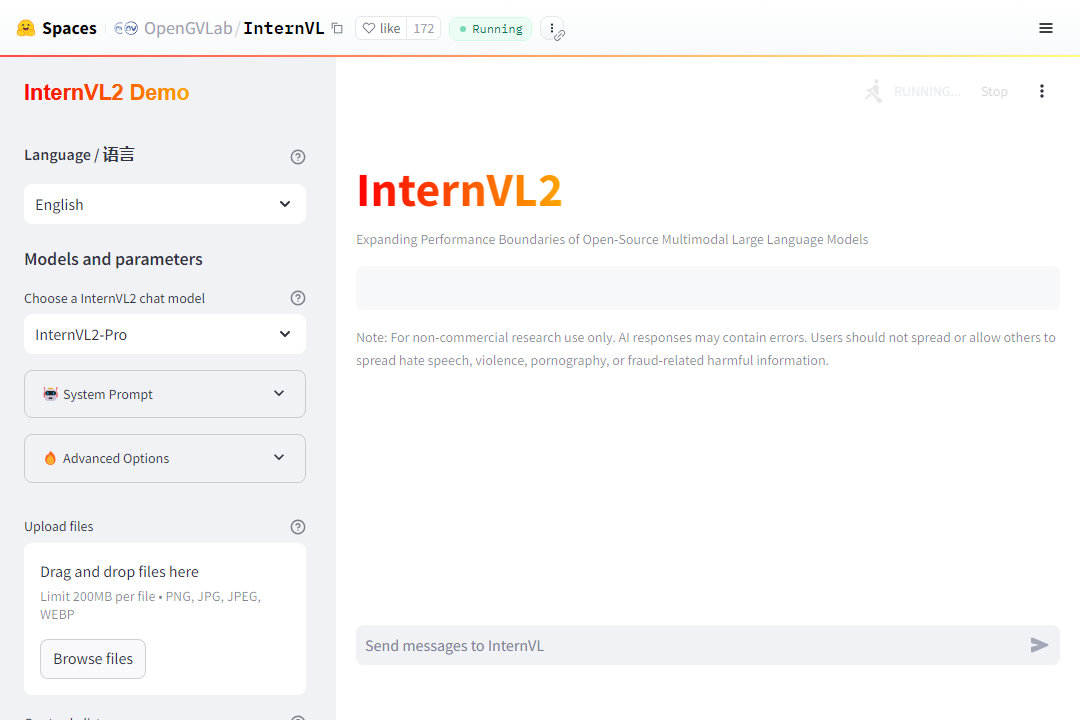

In [3]:
png=wd.get_screenshot_as_png()
png=BytesIO(png)
Image.open(png)

# TODO

* upload files
* chat
* get response
* clear history
* auto choose file
* complete! 

In [4]:
def locate_page(wd):
    # 使用 XPath 定位 iframe 元素
    # 等待 iframe 加载完成
    wd.switch_to.default_content()
    WebDriverWait(wd, 10).until(
        EC.frame_to_be_available_and_switch_to_it(
            (By.XPATH, "//iframe[contains(@src, 'opengvlab-internvl.hf.space')]")
        )
    )

    WebDriverWait(wd, 10).until(
        EC.frame_to_be_available_and_switch_to_it(
            (By.XPATH, "//iframe[contains(@src, 'https://internvl.opengvlab.com/')]")
        )
    )


def upload_file(wd, file_path):
    # upload file
    file_upload_btn = WebDriverWait(wd, 10).until(
        EC.presence_of_element_located(
            (By.XPATH, "//input[contains(@data-testid, 'stFileUploaderDropzoneInput')]")
        )
    )

    # 点击按钮后等待对话框出现
    # 可以使用 time.sleep() 或 WebDriverWait 等待
    time.sleep(2)

    file_upload_btn.send_keys(file_path)


def chat(wd, text: str):
    # send message
    text_area = WebDriverWait(wd, 10).until(
        EC.presence_of_element_located(
            (By.CSS_SELECTOR, "textarea[data-testid='stChatInputTextArea']")
        )
    )

    # 输入文本
    text_area.send_keys(text)

    # 模拟发送消息 (可选)
    text_area.send_keys(Keys.ENTER)


def get_chat(
    wd,
) -> str:
    # 定位包含回答文本的 <div> 元素
    answer_containers = WebDriverWait(wd, 20).until(
        EC.presence_of_all_elements_located(
            (By.CSS_SELECTOR, "div[data-testid='stChatMessageContent']")
        )
    )

    if len(answer_containers) % 2 != 0:
        return "again"

    text = (
        answer_containers[len(answer_containers) - 1]
        .find_element(By.TAG_NAME, "p")
        .text
    )
    return text


def clear_history(
    wd,
):
    # clear history
    # 定位 "Clear Chat History" 按钮
    clear_hisory_btn = WebDriverWait(wd, 10).until(
        EC.presence_of_all_elements_located(
            (By.CSS_SELECTOR, "div[data-testid='stHorizontalBlock']")
        )
    )[-1]
    try:
        clear_hisory_btn.find_element(By.TAG_NAME, "button").click()
    except Exception as e:
        refresh_page(wd)
        time.sleep(5)
        wd.switch_to.default_content()
        locate_page(wd)


def refresh_page(
    wd,
):
    wd.refresh()
    time.sleep(3)
    # 等待 JavaScript 加载完成
    WebDriverWait(wd, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
    print("load complete")


def choose_model(wd, model_name='InternVL2-2B'):
    selectbox = WebDriverWait(wd, 10).until(
        EC.presence_of_all_elements_located(
            (By.CSS_SELECTOR, "div[data-testid='stSelectbox']")
        )
    )[1]
    selectbox.click()

    option = WebDriverWait(wd, 10).until(
        EC.element_to_be_clickable((By.XPATH, f"//div[text()='{model_name}']"))
    )
    option.click()

In [5]:
# refresh_page(wd)
locate_page(wd)

In [8]:
upload_file(wd, r'E:\BaiduNetdiskDownload\all_cameras\11\00cb09b7-0362-42f9-a32d-8169a68da583\1_00cb09b7-0362-42f9-a32d-8169a68da583.png')
time.sleep(5)
chat(wd, "You only need to answer whether there is water accumulation in the picture, that is, whether there is water accumulation or no water accumulation, just these three words. But the requirement is that if there is water accumulation, the depth of the water must exceed approximately 5cm.")
time.sleep(5)
print(get_chat(wd))
time.sleep(3)
clear_history(wd)

No water accumulation.


In [12]:
base_path = r'E:\BaiduNetdiskDownload\all_cameras'
sub_dirs_paths = [os.path.join(base_path, sub_dir_path) for sub_dir_path in os.listdir(base_path)]

sub_sub_dirs=[]

for sub_dir_path in sub_dirs_paths:
    sub_sub_dirs += [os.path.join(sub_dir_path, sub_sub_dir_path) for sub_sub_dir_path in os.listdir(sub_dir_path)]

sub_sub_dirs_len = len(sub_sub_dirs)
for idx in range(sub_sub_dirs_len):
    if len(os.listdir(sub_sub_dirs[idx])) > 5:
        for sub_sub_dir in os.listdir(sub_sub_dirs[idx]):
            sub_sub_dirs.append(os.path.join(sub_sub_dirs[idx], sub_sub_dir))


In [13]:
for idx, sub_sub_dir in enumerate(sub_sub_dirs[:5]):
    if os.path.isdir(os.path.join(sub_sub_dir, os.listdir(sub_sub_dir)[0])):
        continue
    imgs = [os.path.join(sub_sub_dir, file_path) for file_path in os.listdir(sub_sub_dir)]
    target=None
    for img in imgs:
        if img.endswith('png'):
            target = img
            break
    upload_file(wd, target)
    time.sleep(5)
    chat(wd, "You only need to answer whether there is water accumulation in the picture, that is, whether there is water accumulation or no water accumulation, just these three words. But the requirement is that if there is water accumulation, the depth of the water must exceed approximately 5cm.")
    time.sleep(5)
    res = get_chat(wd)
    print(f'{res}: {target}')
    time.sleep(5)
    clear_history(wd)
    time.sleep(5)
    
    
    

No water accumulation.: E:\BaiduNetdiskDownload\all_cameras\09\0012c3b8-3d29-4859-aaab-533dbedd3ad9\1_0012c3b8-3d29-4859-aaab-533dbedd3ad9.png
No water accumulation.: E:\BaiduNetdiskDownload\all_cameras\09\00284894-fe2a-4e0c-a635-f4a7d826b53d\1_00284894-fe2a-4e0c-a635-f4a7d826b53d.png
No water accumulation.: E:\BaiduNetdiskDownload\all_cameras\09\004f52dc-70df-49de-bf72-8f633e55600a\1_004f52dc-70df-49de-bf72-8f633e55600a.png
No water accumulation.: E:\BaiduNetdiskDownload\all_cameras\09\006fe828-bd6d-48a5-adad-b73a69216992\1_006fe828-bd6d-48a5-adad-b73a69216992.png
No water accumulation: E:\BaiduNetdiskDownload\all_cameras\09\00929333-4f40-498f-ae34-7739b166a0ae\1_00929333-4f40-498f-ae34-7739b166a0ae.png


In [6]:
def check_fd(fd):
    if not os.path.exists(fd):
        os.mkdir(fd)

def copy_img_fd(img, fd):
    check_fd(fd)
    shutil.copy(img, fd)

# copy_img_fd(r'E:\BaiduNetdiskDownload\cut\_2024_06_30_02_09_04_787.mp4_frame_20_block_0_2.jpg', r'E:\BaiduNetdiskDownload\fuck')

In [7]:

base_path= r'E:\BaiduNetdiskDownload\cut'
base = r'E:\BaiduNetdiskDownload'
os.chdir(base)
img_paths = [os.path.join(base_path, img_path) for img_path in os.listdir(base_path)]


for idx, img in enumerate(img_paths[118:]):
    try:
        # ensure model
        choose_model(wd)
        time.sleep(3)
        upload_file(wd, img)
        chat(wd, "You only need to answer whether there is water accumulation in the picture, that is, whether there is water accumulation or no water accumulation, just these words. And the requirement is that if there is water accumulation, the depth of the water must exceed approximately 5cm.")
        time.sleep(3)
        ans = get_chat(wd)
        copy_img_fd(img, ans)
        print(f'{ans}: {idx+1} {img}')
        if (idx+1) % 4 == 0:
            clear_history(wd)
            time.sleep(3)
    except NotADirectoryError as e:
        print(f'{idx+1}: lost {img}')
        copy_img_fd(img, 'lost')
        refresh_page(wd)
        time.sleep(3)
        locate_page(wd)
        choose_model(wd)
    except FileNotFoundError as e:
        print(f'{idx+1}: thinking lost {img}')
        copy_img_fd(img, 'lost')
        time.sleep(3)
    except:
        print(f'{idx+1}: lost {img}')
        copy_img_fd(img, 'lost')
        clear_history(wd)
        time.sleep(3)
    # except NoSuchElementException as e:
        
    # except ElementNotInteractableException as e:
    #     clear_history(wd)
    #     time.sleep(3)

No water accumulation.: 1 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_170_block_3_1.jpg
No water accumulation.: 2 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_170_block_3_2.jpg
No water accumulation.: 3 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_190_block_0_0.jpg
No water accumulation.: 4 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_190_block_0_1.jpg
5: thinking lost E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_190_block_0_2.jpg
No: 6 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_190_block_1_0.jpg
No: 7 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_190_block_1_1.jpg
No: 8 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_190_block_1_2.jpg
No water accumulation.: 9 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_751.mp4_frame_190_block_2_0.jpg
No water accumulation.: 10 E:\BaiduNetdiskDownload\cut\-XL_2024_06_30_02_11_57_